In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing the ords_prods_customer_merged data frame from exercise 9
ords_prods_customer_merged = pd.read_pickle (r'C:\Users\49157\Downloads\Instacart Basket Analysis -Blessing Osimahon\02 Data\Prepared Data\ords_prods_customer_merged')

# Part 2

In [ ]:
# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

# When handling a new dataset, especially one that includes PII (Personally Identifiable Information),some security implications must be considered to ensure data protection and compliance with relevant privacy laws and regulations. Here are some key security implications and best practices:
1) Sensitive data can be accessed by unauthorized individuals, leading to data breaches.
2) Ensure that only authorized personnel have access to the PII.

# When dealing with Personally Identifiable Information (PII) in our data, it's important to take steps to protect this sensitive information before proceeding with your analysis. Here are some actions one can take to address any PII concerns:
1) Identifying PII Columns:
Determine which columns contain PII. Common examples of PII include names, addresses, phone numbers, email addresses, social security numbers, etc.
2) Removing PII Columns to create a sanitized version of the customer DataFrame.

# Securing PII is crucial to maintaining the trust of individuals and complying with legal requirements. By understanding the security implications and implementing security measures, one can protect sensitive data from various threats and ensure its integrity and confidentiality.

# Part 3a

In [ ]:
# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. 
# You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [3]:
# Define states by region
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']


In [4]:
# Create 'Region' column with default value
ords_prods_customer_merged['region'] = 'Unknown'

In [5]:
# Assign regions based on the state
ords_prods_customer_merged.loc[ords_prods_customer_merged['state'].isin(northeast), 'region'] = 'Northeast'
ords_prods_customer_merged.loc[ords_prods_customer_merged['state'].isin(midwest), 'region'] = 'Midwest'
ords_prods_customer_merged.loc[ords_prods_customer_merged['state'].isin(south), 'region'] = 'South'
ords_prods_customer_merged.loc[ords_prods_customer_merged['state'].isin(west), 'region'] = 'West'

In [6]:
ords_prods_customer_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,merge_indicator,region
0,65,1,1,2,8,NaN,-60,1,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,65,1,1,2,8,NaN,4,2,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,65,1,1,2,8,NaN,-117,3,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,65,1,1,2,8,NaN,-24,4,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,65,1,1,2,8,NaN,37,5,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


# Part 3b

In [7]:
# Determine whether there’s a difference in spending habits between the different U.S. regions. 
# (Hint: You can do this by crossing the variable you just created with the spending flag.)
crosstab = pd.crosstab(ords_prods_customer_merged['region'], ords_prods_customer_merged['spender_flag'], dropna=False)

# Display the crosstab
print(crosstab)

spender_flag  High spender  Low spender
region                                 
Midwest              72318      3552138
Northeast            50536      2788083
South               110283      5237105
West                 81274      4246624


In [12]:
crosstab.to_clipboard()

In [4]:
# Create path
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis '
path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

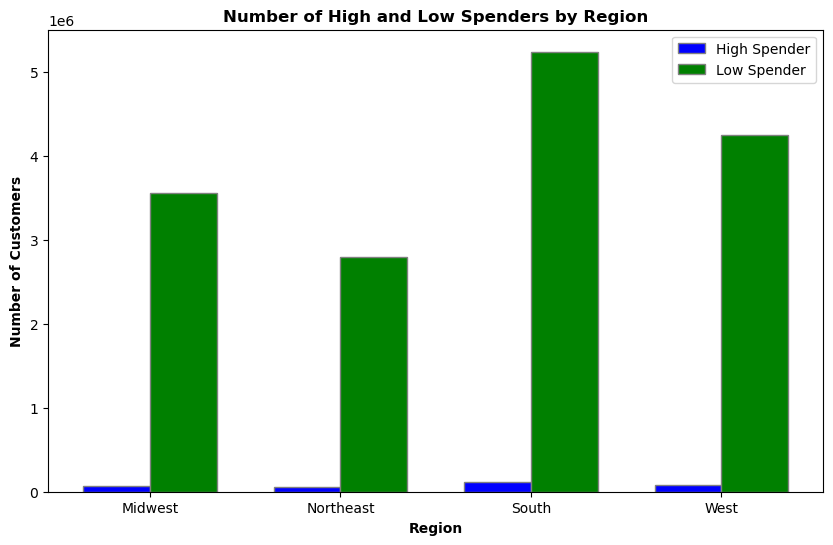

In [5]:
# Data
regions = ['Midwest', 'Northeast', 'South', 'West']
high_spenders = [72318, 50536, 110283, 81274]
low_spenders = [3552138, 2788083, 5237105, 4246624]

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, high_spenders, color='b', width=bar_width, edgecolor='grey', label='High Spender')
plt.bar(r2, low_spenders, color='g', width=bar_width, edgecolor='grey', label='Low Spender')

# Adding labels
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.title('Number of High and Low Spenders by Region', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(regions))], regions)
plt.legend()


# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number of High and Low Spenders by Region.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

# Display the bar chart
plt.show()


# Part 4

In [ ]:
# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
# Create an exclusion flag for low activity customers (customers with less than 5 orders) and exclude them from the data. 
# Make sure you export this sample.

In [8]:
ords_prods_customer_merged.loc[ords_prods_customer_merged['max_order'] < 5, 'exclusion_flag'] = 'low_activity'
ords_prods_customer_merged.loc[ords_prods_customer_merged['max_order'] > 5, 'exclusion_flag'] = 'high_activity'

In [13]:
ords_prods_customer_merged['exclusion_flag']. value_counts(dropna = False)

exclusion_flag
high_activity    15027416
low_activity       713168
NaN                397777
Name: count, dtype: int64

In [10]:
# lets create a data frame for low activity customers
ords_prods_customer_merged_low_activity_customers = ords_prods_customer_merged[ords_prods_customer_merged['exclusion_flag'] == 'low_activity']

In [9]:
# lets create a data frame for high activity customers
ords_prods_customer_merged_high_activity_customers = ords_prods_customer_merged[ords_prods_customer_merged['exclusion_flag'] =='high_activity']

In [12]:
# Checking output of low activity customers
ords_prods_customer_merged_low_activity_customers[('max_order')].value_counts()

max_order
4    374092
3    339068
1         5
2         3
Name: count, dtype: int64

In [13]:
# Exporting the ords_prods_customer_merged_low_activity_customers
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis'

path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

In [ ]:
       ords_prods_customer_merged_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customer_merged_low_activity_customers.to_pkl')) 

# Part 5

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [ ]:
# Create a profiling variable based on age

In [10]:
# If the age of the customer  is over 60, then the customer will be labeled “old_aged_adults.”
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['age'] > 60, 'age_bracket'] = 'old_aged_adults'

# If the age of the customer is over 30 but less than or equal to 60, then the customer will be labeled a “middle aged.”
ords_prods_customer_merged_high_activity_customers.loc[(ords_prods_customer_merged_high_activity_customers['age'] <= 60) & (ords_prods_customer_merged_high_activity_customers['age'] > 30), 'age_bracket'] = 'middle_aged'

#If the age of the customer is less than or equal to 30, then the customer will be labeled a “young_adults.”
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['age'] <= 30, 'age_bracket'] = 'young_adults'

C:\Users\49157\AppData\Local\Temp\ipykernel_20840\1154447494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['age'] > 60, 'age_bracket'] = 'old_aged_adults'


In [28]:
ords_prods_customer_merged_high_activity_customers['age_bracket']. value_counts(dropna = False)

age_bracket
middle_aged        6996970
old_aged_adults    5284403
young_adults       2746043
Name: count, dtype: int64

In [ ]:
# Create a profiling variable based on income

In [11]:
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['income'] <= 50000, 'income_earners'] = 'Low earner'
ords_prods_customer_merged_high_activity_customers.loc[(ords_prods_customer_merged_high_activity_customers['income'] > 50000) & (ords_prods_customer_merged_high_activity_customers['income'] < 150000), 'income_earners'] = 'Mid earner'
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['income'] >= 150000, 'income_earners'] = 'High earner'


C:\Users\49157\AppData\Local\Temp\ipykernel_20840\539352359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['income'] <= 50000, 'income_earners'] = 'Low earner'


In [30]:
ords_prods_customer_merged_high_activity_customers['income_earners']. value_counts(dropna = False)

income_earners
Mid earner     10825838
Low earner      2513042
High earner     1688536
Name: count, dtype: int64

In [ ]:
# Importing department data frame

In [124]:
df_department = pd.read_csv (r'C:\Users\49157\Downloads\Instacart Basket Analysis\02 Data\Original Data\4.4_departments\departments.csv', index_col = False)

In [38]:
df_department.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [ ]:
# Create a profiling variable based on department-id

In [12]:
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['department_id']== 17, 'department_group'] = 'Household items'
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['department_id']== 4, 'department_group'] = 'Produce'
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['department_id'].isin([3, 7, 15]), 'department_group'] = 'Fast foods'
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['department_id'].isin([5,19]), 'department_group'] = 'Refreshments'

C:\Users\49157\AppData\Local\Temp\ipykernel_20840\1480414340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['department_id']== 17, 'department_group'] = 'Household items'


In [32]:
ords_prods_customer_merged_high_activity_customers['department_group']. value_counts(dropna = False)

department_group
NaN                6579100
Produce            4404334
Fast foods         2287049
Refreshments       1419443
Household items     337490
Name: count, dtype: int64

In [ ]:
# Create a profiling variable based on number_of_dependants

In [13]:
# Create a profiling variable based on orders_day_of_week
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['order_day_of_week'].isin([0,1]), 'group_day'] = 'Weekend'
ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['order_day_of_week'].isin([2,3,4,5,6]), 'group_day'] = 'Weekday'

C:\Users\49157\AppData\Local\Temp\ipykernel_20840\3585489850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[ords_prods_customer_merged_high_activity_customers['order_day_of_week'].isin([0,1]), 'group_day'] = 'Weekend'


In [34]:
ords_prods_customer_merged_high_activity_customers['group_day']. value_counts(dropna = False)

group_day
Weekday    9532173
Weekend    5495243
Name: count, dtype: int64

In [14]:
# Create a profiling variable based on order_hour_of_day.
ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] >= 6) & 
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] <= 12), 
    'hour_group'] = 'Morning Shopper'

ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] > 12) & 
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] <= 18), 
    'hour_group'] = 'Afternoon Shopper'

ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] > 18) & 
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] <= 22), 
    'hour_group'] = 'Night Shopper'

ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] > 22) | 
    (ords_prods_customer_merged_high_activity_customers['order_hour_of_day'] < 6), 
    'hour_group'] = 'Late Night Shopper'


C:\Users\49157\AppData\Local\Temp\ipykernel_20840\1398423452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[


In [15]:
ords_prods_customer_merged_high_activity_customers['hour_group']. value_counts(dropna = False)

hour_group
Afternoon Shopper     6581478
Morning Shopper       6290273
Night Shopper         1693725
Late Night Shopper     461940
Name: count, dtype: int64

In [16]:
# Categorize high_activity_customers based on the number of dependents
# If the customer has no dependents and is less than or equal to 30 years old, label them as “Single Adult.”
ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['number_of_dependants'] == 0) &
    (ords_prods_customer_merged_high_activity_customers['age'] <= 30),
    'profile'] = 'Single Adult'

# If the customer has one or more dependents and is less than or equal to 30 years old, label them as “Young Parent.”
ords_prods_customer_merged_high_activity_customers.loc[
    (ords_prods_customer_merged_high_activity_customers['number_of_dependants'] > 0) &
    (ords_prods_customer_merged_high_activity_customers['age'] <= 30),
    'profile'] = 'Young Parent'

C:\Users\49157\AppData\Local\Temp\ipykernel_20840\1069947808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customer_merged_high_activity_customers.loc[


In [17]:
ords_prods_customer_merged_high_activity_customers['profile']. value_counts(dropna = False)

profile
NaN             12281373
Young Parent     1696895
Single Adult     1049148
Name: count, dtype: int64

In [18]:
ords_prods_customer_merged_high_activity_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,income,merge_indicator,region,exclusion_flag,age_bracket,income_earners,department_group,group_day,hour_group,profile
0,65,1,1,2,8,NaN,-60,1,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Fast foods,Weekday,Morning Shopper,NaN
1,65,1,1,2,8,NaN,4,2,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,NaN,Weekday,Morning Shopper,NaN
2,65,1,1,2,8,NaN,-117,3,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
3,65,1,1,2,8,NaN,-24,4,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
4,65,1,1,2,8,NaN,37,5,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Household items,Weekday,Morning Shopper,NaN


# Part 6

In [ ]:
# Create an appropriate visualization to show the distribution of profiles.

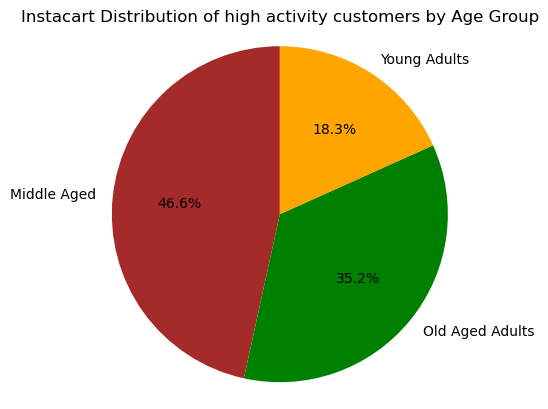

In [105]:
#  Age bracket
# Data
age_bracket_labels = ['Middle Aged', 'Old Aged Adults', 'Young Adults']
age_bracket_sizes = [6996970, 5284403, 2746043]

# Calculate percentages
total = sum(age_bracket_sizes)
age_bracket_percentages = [(size / total) * 100 for size in age_bracket_sizes]

# Colors for the segments
colors = ['brown', 'green', 'orange']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(age_bracket_percentages, labels=age_bracket_labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Title
plt.title('Instacart Distribution of high activity customers by Age Group')

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart Distribution of high activity customers by Age Group.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

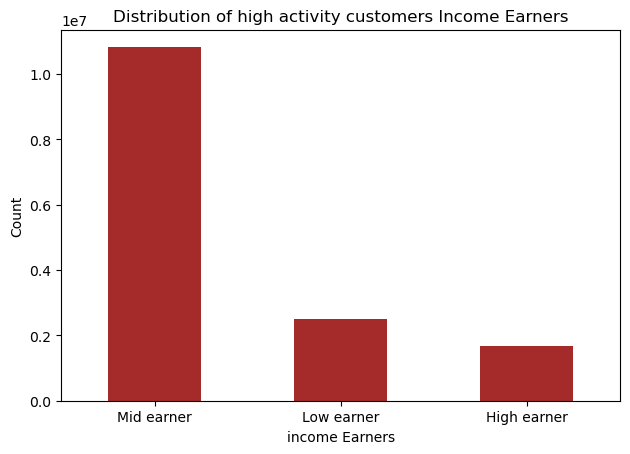

In [107]:
# ords_prods_customer_merged_high_activity_customers is your DataFrame
# and income_earners is a column in that DataFrame
ords_prods_customer_merged_high_activity_customers['income_earners'].value_counts().plot(kind='bar', color='brown')

plt.xlabel('income Earners')
plt.ylabel('Count')
plt.title('Distribution of high activity customers Income Earners')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution of high activity customers Income Earners.png'), bbox_inches = 'tight')
plt.show()

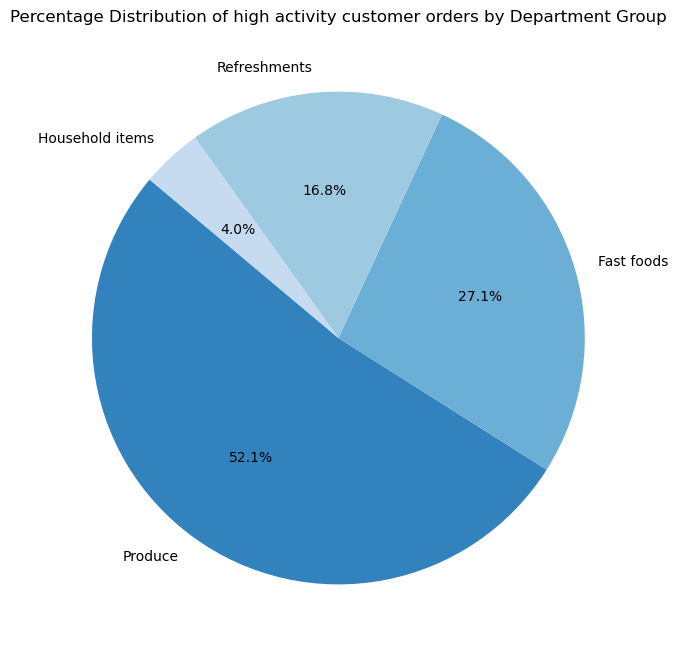

In [108]:
# Data
department_groups = ['Produce', 'Fast foods', 'Refreshments', 'Household items']
values = [4404334, 2287049, 1419443, 337490]

# Plotting
plt.figure(figsize=(8, 8))  # Square figure for better layout of pie chart
plt.pie(values, labels=department_groups, autopct='%1.1f%%', colors=plt.cm.tab20c.colors, startangle=140)

# Adding title
plt.title('Percentage Distribution of high activity customer orders by Department Group')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Percentage Distribution of high activity customer orders by Department Group.png'), bbox_inches = 'tight')
plt.show()

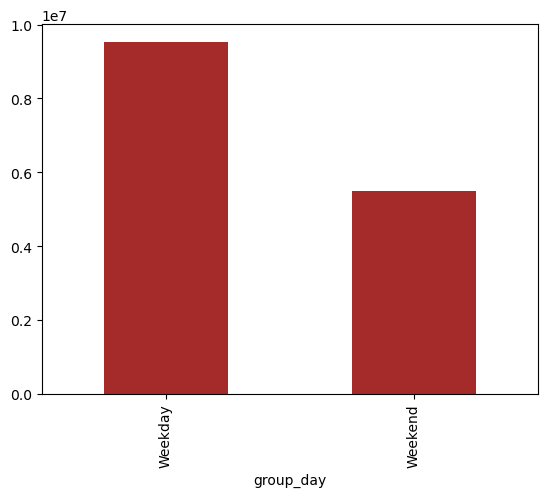

In [38]:
# Group day
bar = ords_prods_customer_merged_high_activity_customers ['group_day'].value_counts().plot.bar(color = ['brown'])
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_activity_customers_group_day.png'))

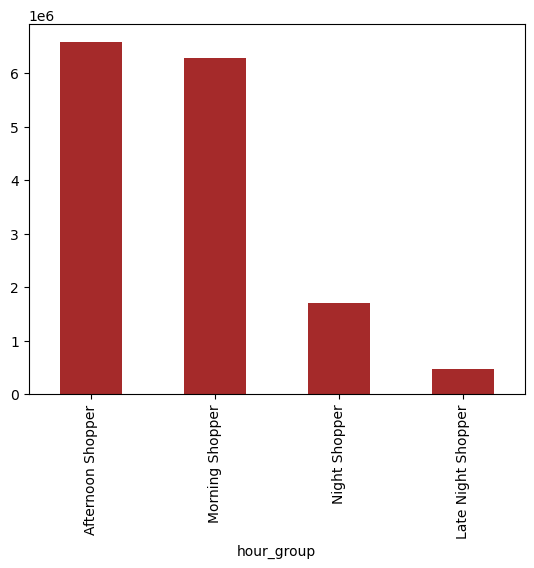

In [39]:
# hour group
bar = ords_prods_customer_merged_high_activity_customers ['hour_group'].value_counts().plot.bar(color = ['brown'])
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_activity_customers_hour_group.png'))

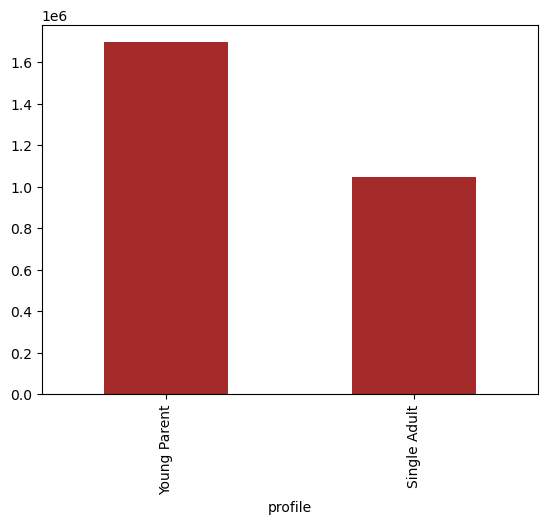

In [120]:
# profile
bar = ords_prods_customer_merged_high_activity_customers ['profile'].value_counts().plot.bar(color = ['brown'])
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_activity_customers_profiling.png'))

# Part 7

In [ ]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure---- I have no idea about this question

In [19]:
ords_prods_customer_merged_high_activity_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,income,merge_indicator,region,exclusion_flag,age_bracket,income_earners,department_group,group_day,hour_group,profile
0,65,1,1,2,8,NaN,-60,1,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Fast foods,Weekday,Morning Shopper,NaN
1,65,1,1,2,8,NaN,4,2,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,NaN,Weekday,Morning Shopper,NaN
2,65,1,1,2,8,NaN,-117,3,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
3,65,1,1,2,8,NaN,-24,4,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
4,65,1,1,2,8,NaN,37,5,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Household items,Weekday,Morning Shopper,NaN


In [20]:
ords_prods_customer_merged_high_activity_customers.groupby('frequency_flag').agg({'prices': ['sum', 'count']})

prices          
                               sum     count
frequency_flag                              
Frequent customer      119103168.0  10472988
Non-frequent customer   15162553.0   1242237
Regular customer        42115064.0   3312191

In [21]:
ords_prods_customer_merged_high_activity_customers.groupby('hour_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                         mean  min      max
hour_group                                 
Afternoon Shopper   11.957345  1.0  99999.0
Late Night Shopper  10.902469  1.0  99999.0
Morning Shopper     11.779797  1.0  99999.0
Night Shopper       10.951814  1.0  99999.0

# Part 8

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
# Age vs regions 

In [ ]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['age_bracket'], dropna=False)

# Display the crosstab
print(crosstab)

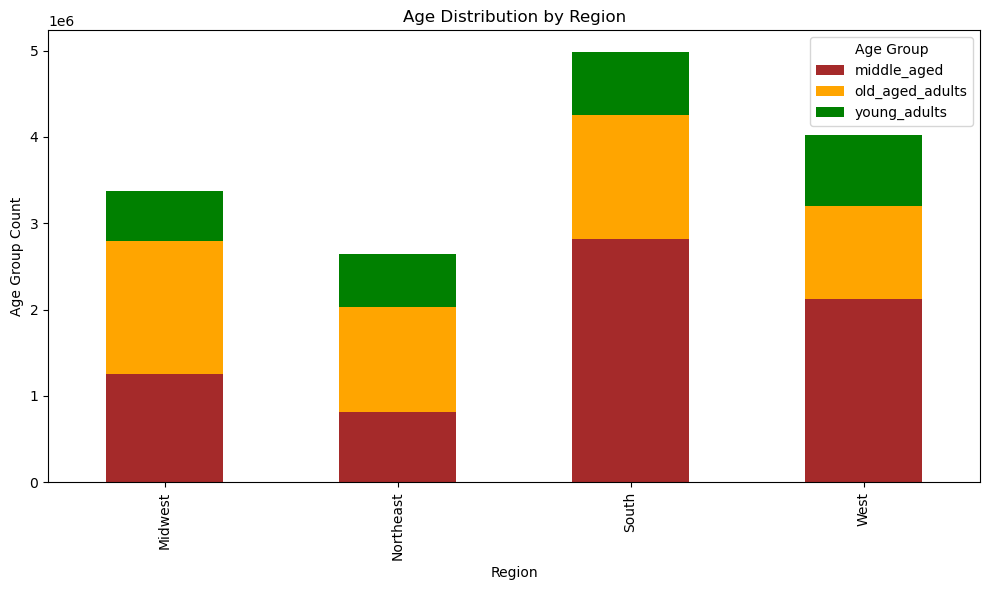

In [109]:
# Provided data
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'middle_aged': [1249128, 815859, 2814723, 2117260],
    'old_aged_adults': [1543634, 1212990, 1444720, 1083059],
    'young_adults': [579978, 614760, 726282, 825023]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'region' as the index
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['brown', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Age Group Count')
plt.title('Age Distribution by Region')
plt.legend(title='Age Group', loc='best')

# Save the plot
plt.tight_layout()

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_distribution_by_region.png'), bbox_inches = 'tight')

# Display the plot
plt.show()


In [ ]:
# Income vs regions

In [123]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['income_earners'], dropna=False)

# Display the crosstab
print(crosstab)

income_earners  High earner  Low earner  Mid earner
region                                             
Midwest              356798      355802     2660140
Northeast            253178      479950     1910481
South                844331      860564     3280830
West                 234229      816726     2974387


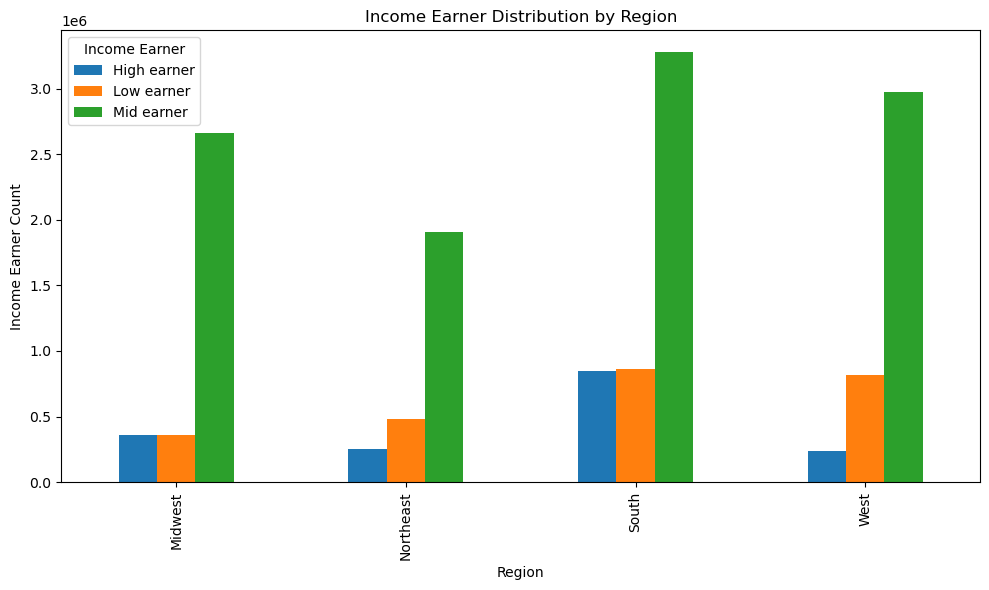

In [110]:
# Provided data
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'High earner': [356798, 253178, 844331, 234229],
    'Low earner': [355802, 479950, 860564, 816726],
    'Mid earner': [2660140, 1910481, 3280830, 2974387]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'region' as the index
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Income Earner Count')
plt.title('Income Earner Distribution by Region')
plt.legend(title='Income Earner', loc='best')

# Save the plot
plt.tight_layout()

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_earners_by_region.png'), bbox_inches = 'tight')

# Display the plot
plt.show()


In [ ]:
# Department vs region

In [124]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['department_group'], dropna=False)

# Display the crosstab
print(crosstab)

department_group  Fast foods  Household items  Miscellaneous  Pet care  \
region                                                                   
Midwest               521582            77452           3583     10381   
Northeast             401819            58484           2936      7124   
South                 753028           112790           5547     14531   
West                  610620            88764           4556     11989   

department_group  Produce  Refreshments      NaN  
region                                            
Midwest            981826        319477  1458439  
Northeast          774995        246524  1151727  
South             1466476        475085  2158268  
West              1181037        378357  1750019  


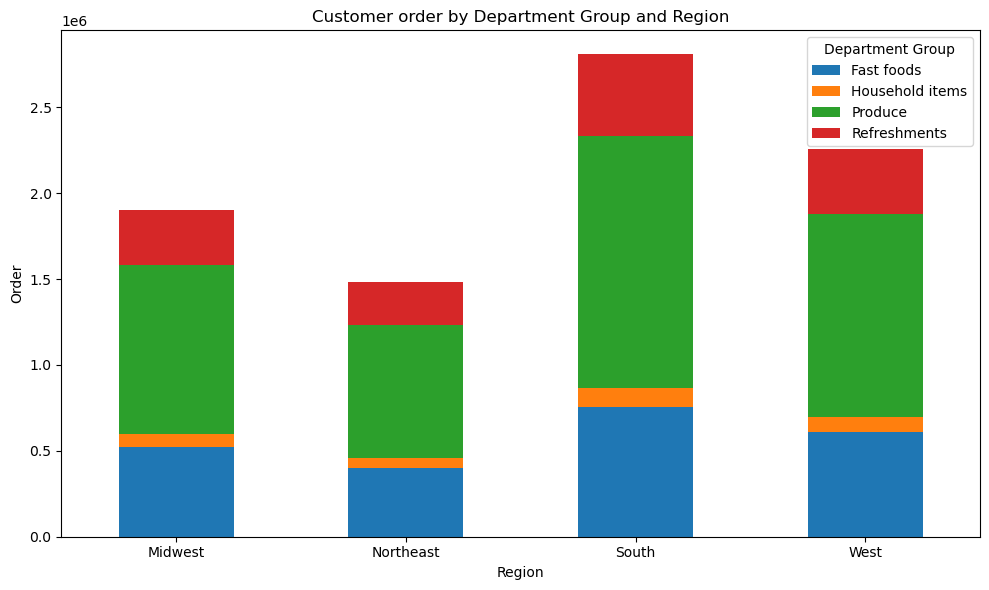

In [111]:
# Data provided
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Fast foods': [521582, 401819, 753028, 610620],
    'Household items': [77452, 58484, 112790, 88764],
    'Produce': [981826, 774995, 1466476, 1181037],
    'Refreshments': [319477, 246524, 475085, 378357]
   }

# Convert data to a DataFrame
df = pd.DataFrame(data)
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customizing the plot
ax.set_xlabel('Region')
ax.set_ylabel('Order')
ax.set_title('Customer order by Department Group and Region')
ax.legend(title='Department Group')

plt.xticks(rotation=0)
plt.tight_layout()

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_order_by_department_and_region.png'), bbox_inches = 'tight')
plt.show()


In [ ]:
# Day vs region

In [125]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['group_day'], dropna=False)

# Display the crosstab
print(crosstab)

group_day  Weekday  Weekend
region                     
Midwest    2144498  1228242
Northeast  1682092   961517
South      3159752  1825973
West       2545831  1479511


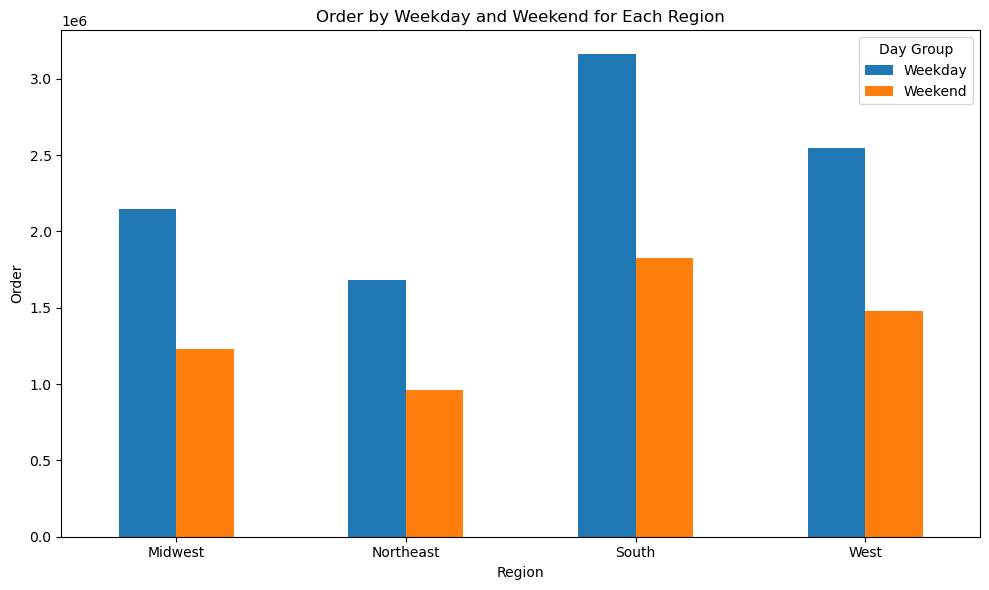

In [112]:
# Data provided
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Weekday': [2144498, 1682092, 3159752, 2545831],
    'Weekend': [1228242, 961517, 1825973, 1479511]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
ax.set_xlabel('Region')
ax.set_ylabel('Order')
ax.set_title('Order by Weekday and Weekend for Each Region')
ax.legend(title='Day Group')

plt.xticks(rotation=0)
plt.tight_layout()

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order by Weekday and Weekend for Each Region.png'), bbox_inches = 'tight')
plt.show()


In [ ]:
# hour group vs region

In [126]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['hour_group'], dropna=False)

# Display the crosstab
print(crosstab)

hour_group  Afternoon Shopper  Late Night Shopper  Morning Shopper  \
region                                                               
Midwest               1472810              103114          1427347   
Northeast             1154657               80172          1104444   
South                 2194811              151369          2077428   
West                  1759200              127285          1681054   

hour_group  Night Shopper  
region                     
Midwest            369469  
Northeast          304336  
South              562117  
West               457803  


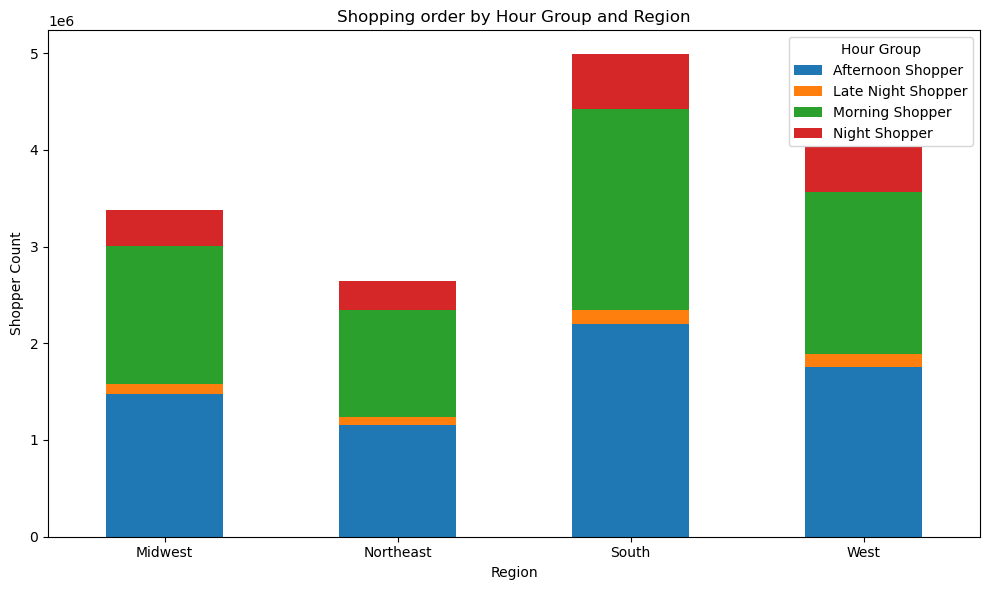

In [113]:
# Data provided
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Afternoon Shopper': [1472810, 1154657, 2194811, 1759200],
    'Late Night Shopper': [103114, 80172, 151369, 127285],
    'Morning Shopper': [1427347, 1104444, 2077428, 1681054],
    'Night Shopper': [369469, 304336, 562117, 457803]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customizing the plot
ax.set_xlabel('Region')
ax.set_ylabel('Shopper Count')
ax.set_title('Shopping order by Hour Group and Region')
ax.legend(title='Hour Group')

plt.xticks(rotation=0)
plt.tight_layout()

# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopping order by Hour Group and Region.png'), bbox_inches = 'tight')
plt.show()


In [ ]:
# Profile vs region 

In [127]:
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['region'],  ords_prods_customer_merged_high_activity_customers ['profile'], dropna=False)

# Display the crosstab
print(crosstab)

profile    Single Adult  Young Parent      NaN
region                                        
Midwest          231534        348444  2792762
Northeast             0        614760  2028849
South            351806        374476  4259443
West             465808        359215  3200319


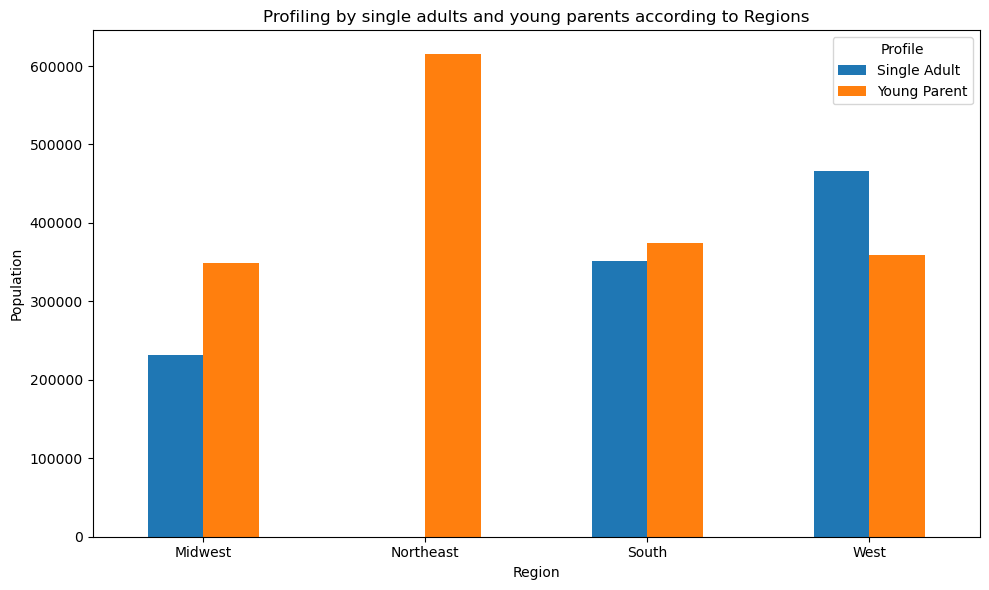

In [114]:
# Data provided
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Single Adult': [231534, 0, 351806, 465808],
    'Young Parent': [348444, 614760, 374476, 359215]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)
df.set_index('region', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
ax.set_xlabel('Region')
ax.set_ylabel('Population')
ax.set_title('Profiling by single adults and young parents according to Regions')
ax.legend(title='Profile')

plt.xticks(rotation=0)
plt.tight_layout()
# Export fig
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiling by single adults and young parents according to Regions.png'), bbox_inches = 'tight')
plt.show()


In [84]:
# Age vs department
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['department_group'],  ords_prods_customer_merged_high_activity_customers ['age_bracket'], dropna=False)

# Display the crosstab
print(crosstab)

age_bracket       middle_aged  old_aged_adults  young_adults
department_group                                            
Fast foods            1066802           803496        416751
Household items        158527           117291         61672
Produce               2048577          1546578        809179
Refreshments           661985           500803        256655
NaN                   3061079          2316235       1201786


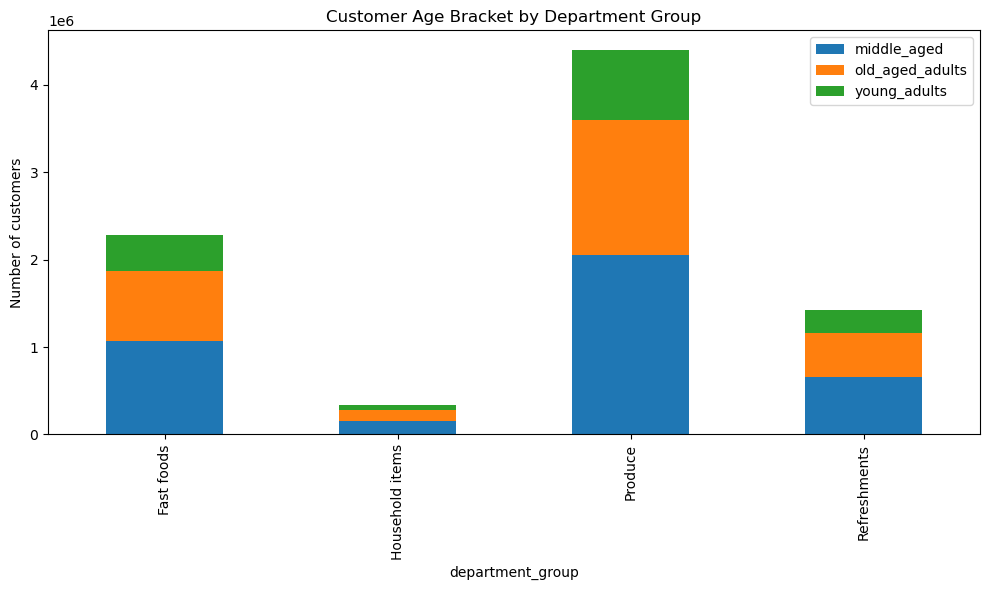

In [115]:
# Sample data
data = {
    'department_group': ['Fast foods', 'Household items', 'Produce', 'Refreshments'],
    'middle_aged': [1066802, 158527, 2048577, 661985],
    'old_aged_adults': [803496, 117291, 1546578, 500803],
    'young_adults': [416751, 61672, 809179, 256655]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('department_group', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot vertical stacked bars
df.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
ax.set_ylabel('Number of customers')
ax.set_title('Customer Age Bracket by Department Group')
ax.legend(loc='upper right')

# Export the plot as an image file (e.g., PNG)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Age Bracket by Department Groups.png'), bbox_inches = 'tight')
plt.show()


In [86]:
# Income vs department group
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['department_group'],  ords_prods_customer_merged_high_activity_customers ['income_earners'], dropna=False)

# Display the crosstab
print(crosstab)

income_earners    High earner  Low earner  Mid earner
department_group                                     
Fast foods             252905      382602     1651542
Household items         37365       56301      243824
Produce                495339      738799     3170196
Refreshments           160294      238000     1021149
NaN                    742633     1097340     4739127


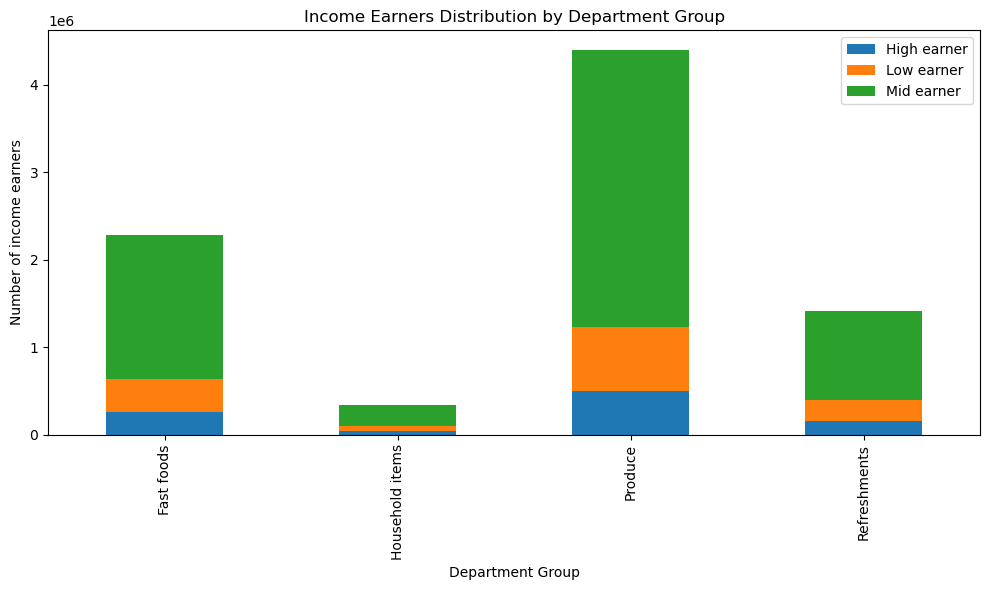

In [117]:
# Sample data
data = {
    'department_group': ['Fast foods', 'Household items', 'Produce', 'Refreshments'],
    'High earner': [252905, 37365, 495339, 160294],
    'Low earner': [382602, 56301, 738799, 238000],
    'Mid earner': [1651542, 243824, 3170196, 1021149]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('department_group', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars
df.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
ax.set_xlabel('Department Group')
ax.set_ylabel('Number of income earners')
ax.set_title('Income Earners Distribution by Department Group')
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income Earners Distribution by Department Group.png'), bbox_inches = 'tight')
plt.show()


In [87]:
# Day vs department group
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['department_group'],  ords_prods_customer_merged_high_activity_customers ['group_day'], dropna=False)

# Display the crosstab
print(crosstab)

group_day         Weekday  Weekend
department_group                  
Fast foods        1474200   812849
Household items    224284   113206
Produce           2716909  1687425
Refreshments       925613   493830
NaN               4191167  2387933


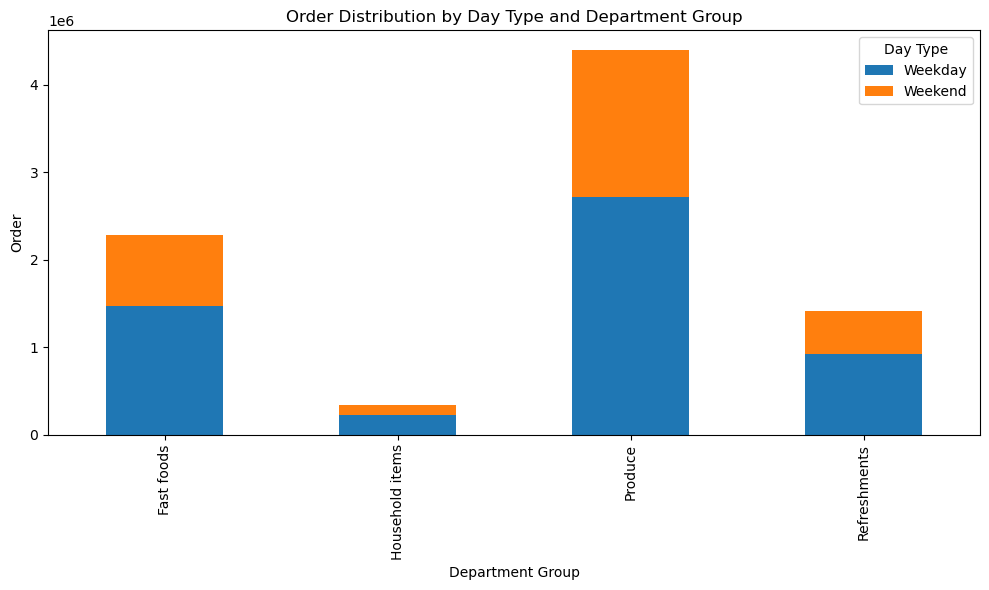

In [118]:
# Sample data
data = {
    'department_group': ['Fast foods', 'Household items', 'Produce', 'Refreshments'],
    'Weekday': [1474200, 224284, 2716909, 925613],
    'Weekend': [812849, 113206, 1687425, 493830]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('department_group', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars
df.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
ax.set_xlabel('Department Group')
ax.set_ylabel('Order')
ax.set_title('Order Distribution by Day Type and Department Group')
ax.legend(title='Day Type')

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Distribution by Day Type and Department Group.png'), bbox_inches = 'tight')
plt.show()


In [88]:
# hour group vs department
crosstab = pd.crosstab( ords_prods_customer_merged_high_activity_customers ['department_group'],  ords_prods_customer_merged_high_activity_customers ['hour_group'], dropna=False)

# Display the crosstab
print(crosstab)

hour_group        Afternoon Shopper  Late Night Shopper  Morning Shopper  \
department_group                                                           
Fast foods                  1004195               68486           970804   
Household items              143845               10797           144585   
Produce                     1911730              141865          1843850   
Refreshments                 625903               38799           606421   
NaN                         2895805              201993          2724613   

hour_group        Night Shopper  
department_group                 
Fast foods               243564  
Household items           38263  
Produce                  506889  
Refreshments             148320  
NaN                      756689  


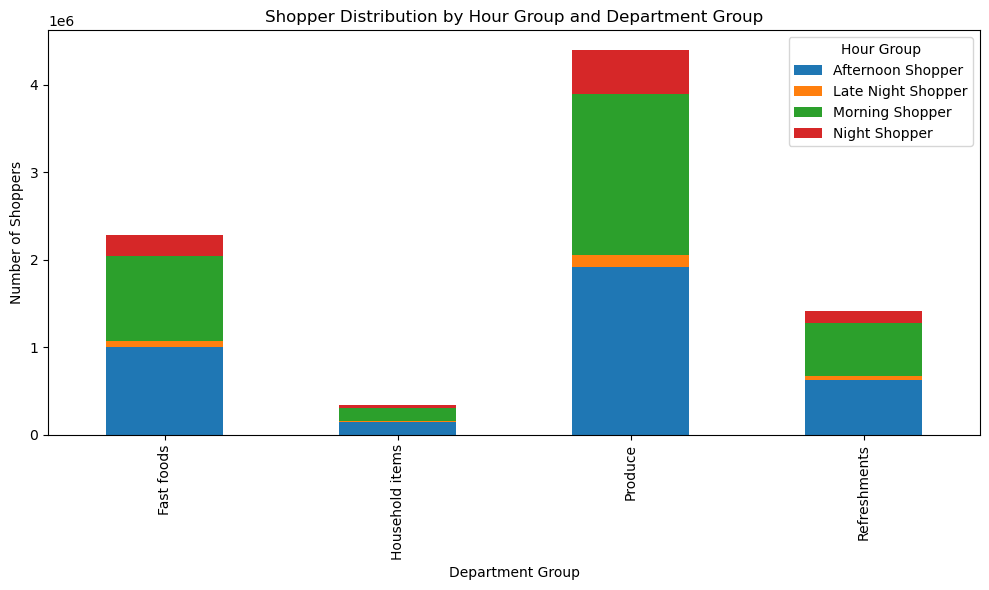

In [119]:
# Sample data
data = {
    'department_group': ['Fast foods', 'Household items', 'Produce', 'Refreshments'],
    'Afternoon Shopper': [1004195, 143845, 1911730, 625903],
    'Late Night Shopper': [68486, 10797, 141865, 38799],
    'Morning Shopper': [970804, 144585, 1843850, 606421],
    'Night Shopper': [243564, 38263, 506889, 148320]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('department_group', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars
df.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
ax.set_xlabel('Department Group')
ax.set_ylabel('Number of Shoppers')
ax.set_title('Shopper Distribution by Hour Group and Department Group')
ax.legend(title='Hour Group')

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopper Distribution by Hour Group and Department Group.png'), bbox_inches = 'tight')
plt.show()

In [121]:
ords_prods_customer_merged_high_activity_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,income,merge_indicator,region,exclusion_flag,age_bracket,income_earners,department_group,group_day,hour_group,profile
0,65,1,1,2,8,NaN,-60,1,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Fast foods,Weekday,Morning Shopper,NaN
1,65,1,1,2,8,NaN,4,2,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,NaN,Weekday,Morning Shopper,NaN
2,65,1,1,2,8,NaN,-117,3,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
3,65,1,1,2,8,NaN,-24,4,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Refreshments,Weekday,Morning Shopper,NaN
4,65,1,1,2,8,NaN,37,5,0,both,...,40423,both,South,high_activity,middle_aged,Low earner,Household items,Weekday,Morning Shopper,NaN


In [122]:
# Exporting the final data frame --- ords_prods_customer_merged_high_activity_customers
# Export data to pkl
ords_prods_customer_merged_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customer_merged_high_activity_customers.pkl'))
